# Parcial I - Métodos Computacionales

**2025-1**

---

Nombre:

Identificación:

---

* ⚠ Explique su código usando con comentarios,

* ❗Todas las funciones deben tener documentación básica,

* 🛑 El uso de IA's no está permitido,

* ⚛ La interpretación del enunciado hace parte de la evaluación,

* ⏲ Este parcial tiene una duración de 2 horas

In [ ]:
# Librerias
# Se llama para operaciones numéricas y vectoriales
import numpy as np
# Se llama para ver o representar datos y gráficos
import matplotlib.pyplot as plt
# Se llama para el análisis de los datos de una tabla
import pandas as pd
# Se emplea cuando se van a emplear cálculos factoriales
from math import factorial
# Esto es una funcion para llamar un raíz
from scipy.optimize import root_scalar, newton, bisect # Funciones para raices

## Ayudas
# np.sign (Signo de una variable)
# np.deg2rad (Convertir grados a radianes)
# pd.Dataframe Genera un dataframe a partir de un diccionario o listas
# df['Columna'] == valor (Crea un filtro para buscar el valor)
# range(0, 10, 2) (Pasos de 2 comenzando en 0 hasta 10)

# 1

**(40 puntos)** El **método de Steffensen** es un algoritmo iterativo para encontrar raíces de ecuaciones no lineales de la forma:

$$
f(x) = 0.
$$

Se basa en aplicar una **aceleración cuadrática** al método de punto fijo, sin necesidad de calcular derivadas, a diferencia del método de Newton.

---
### Pasos para implementar

1. **Definir la función** $f(x)$ cuya raíz se desea encontrar.

   - Se busca una raíz $\alpha$ tal que $f(\alpha) = 0$.

2. **Elegir una aproximación inicial** $x_0$ razonablemente cercana a la raíz.

3. **Aplicar la iteración de Steffensen**:

   Para cada iteración $n$, calcular:

   $$
   y_n = x_n + f(x_n)
   $$

   $$
   x_{n+1} = x_n - \frac{f(x_n)^2}{f(y_n) - f(x_n)}
   $$

   Asegurarse de que $f(y_n) \ne f(x_n)$ para evitar división por cero.

4. **Evaluar el criterio de convergencia**:

   - Repetir el paso 3 hasta que se cumpla
     - $|x_{n+1} - x_n| < \varepsilon$ (precisión sobre el valor de la raíz).

     donde $\varepsilon$ son tolerancias pequeñas definidas por el usuario.

5. **Resultado final**:

   - Cuando se cumple el criterio de convergencia, tomar $x_{n+1}$ como una aproximación a la raíz de $f(x) = 0$.

---


* Defina una función llamada `Steffensen` que calcule la raiz de una función dada. Su función debe tener documentación y retornar el valor de la raiz junto con el número de iteraciones empleadas para alcanzar la convergencia dada una tolerancia.

* Usando
$$\cos(x) = x^2,$$

Grafique la función para $0\leq x \leq \pi/2$ usando 100 puntos. Luego, cree un DataFrame llamado `df` con los datos de $x$ y $f(x)$  encuentre una primera aproximación a la raiz aplicando un filtro en el dataframe con los valores más cercanos a cero.

* Usando el método de Steffensen encuentre la raiz númericamente y compare su resultado usando el método de bisección y secante.

* Para las siguientes tolerancias (ver código) realice un gráfico usando escala logaritimica en $y$ de cuantas iteraciones son necesarias hasta alcanzar la convergencia. ¿Qué puede concluir acerca de la misma?

```python
# Tolerancias
tol = np.logspace(-1, -10, 10)

# Grafico semilog

plt.semilogy(N, tol)

```

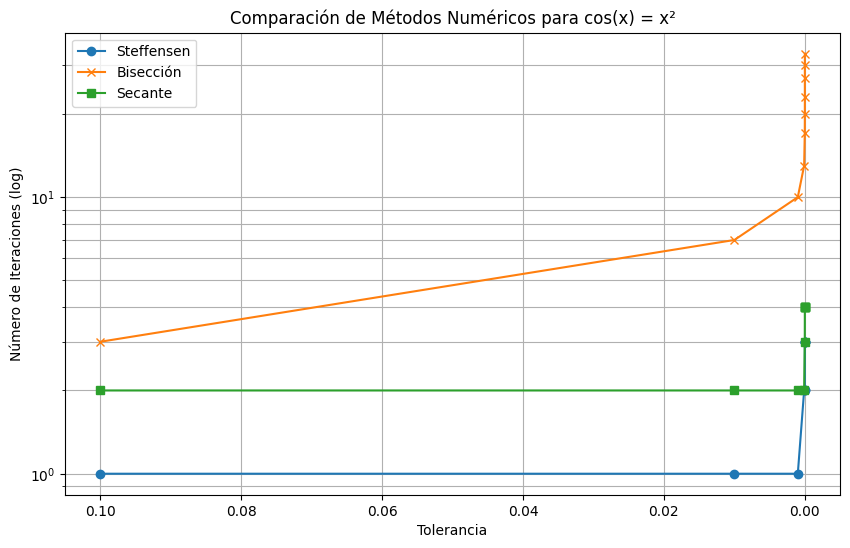

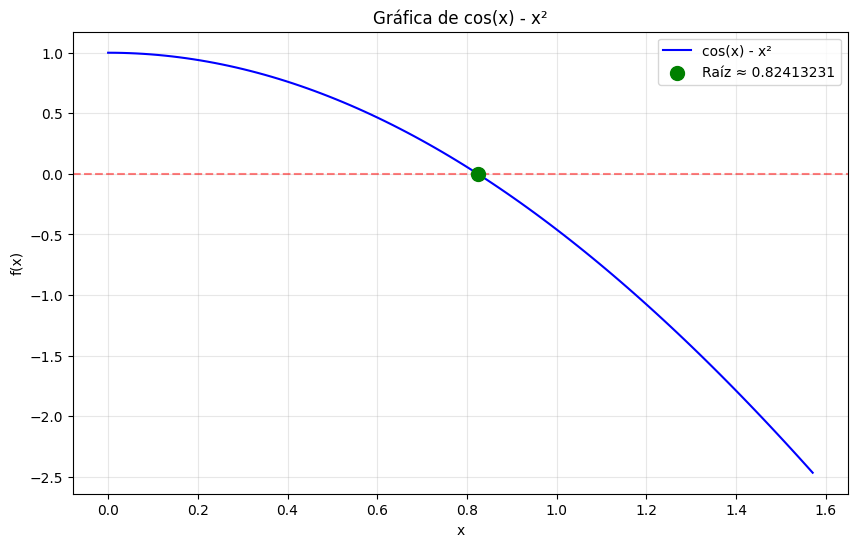

Aproximación inicial encontrada: 0.8250647373064104

Resultados para diferentes tolerancias:
     Tolerancia  Iter_Steff  Iter_Bis  Iter_Sec  Root_Steff  Root_Bis  \
0  1.000000e-01           1         3         2    0.824132  0.883573   
1  1.000000e-02           1         7         2    0.824132  0.828350   
2  1.000000e-03           1        10         2    0.824132  0.824515   
3  1.000000e-04           2        13         2    0.824132  0.824227   
4  1.000000e-05           2        17         3    0.824132  0.824137   
5  1.000000e-06           2        20         4    0.824132  0.824132   
6  1.000000e-07           3        23         4    0.824132  0.824132   
7  1.000000e-08           3        27         4    0.824132  0.824132   
8  1.000000e-09           3        30         4    0.824132  0.824132   
9  1.000000e-10           3        33         4    0.824132  0.824132   

   Root_Sec  
0  0.824135  
1  0.824135  
2  0.824135  
3  0.824135  
4  0.824132  
5  0.824132  
6  0.

In [ ]:
# Aquí va su código

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

def f(x):
    return np.cos(x) - x**2

def steffensen_method(f, x0, tol=1e-7, maxiter=100):
    '''
    Metodo para encontrar raices
  Entradas
    '''
    x_n = x0
    for i in range(maxiter):
        f_xn = f(x_n)
        y_n = x_n + f_xn
        f_yn = f(y_n)
        denom = f_yn - f_xn
# Eliminar la indeterminaciòn
        if abs(denom) < 1e-15:
            return x_n, i, False
#la funciòn
        x_n1 = x_n - (f_xn**2) / denom

        if abs(x_n1 - x_n) < tol:
            return x_n1, i + 1, True

        x_n = x_n1

    return x_n, maxiter, False

def bisection_method(f, a, b, tol=1e-7, maxiter=1000):
    if f(a) * f(b) >= 0:
        return None, 0, False
    iterations = 0
    while (b - a)/2 > tol and iterations < maxiter:
        c = (a + b) / 2
        if f(c) == 0:
            return c, iterations + 1, True
        elif f(c) * f(a) < 0:
            b = c
        else:
            a = c
        iterations += 1
    return (a + b) / 2, iterations, True

def secant_method(f, x0, x1, tol=1e-8, maxiter=100):
    for i in range(maxiter):
        fx0 = f(x0)
        fx1 = f(x1)

        if abs(fx1 - fx0) < 1e-15:
            return x1, i, False

        x2 = x1 - fx1 * (x1 - x0) / (fx1 - fx0)

        if abs(x2 - x1) < tol:
            return x2, i + 1, True

        x0, x1 = x1, x2

    return x1, maxiter, False

# Graficar la función para obtener aproximación inicial
x_vals = np.linspace(0, np.pi/2, 100)
y_vals = f(x_vals)

# Crear DataFrame para encontrar aproximación inicial
df = pd.DataFrame({'x': x_vals, 'f(x)': y_vals})
df['abs_fx'] = np.abs(df['f(x)'])
initial_approximation = df.loc[df['abs_fx'].idxmin(), 'x']

# Configuración de métodos
a_bis = 0
b_bis = np.pi/2
x0_sec = initial_approximation
x1_sec = initial_approximation + 0.1
tolerances = np.logspace(-1, -10, 10)

# Comparación de métodos
results = []
for tol in tolerances:
    root_steff, iter_steff, conv_steff = steffensen_method(f, initial_approximation, tol)
    root_bisect, iter_bisect, conv_bisect = bisection_method(f, a_bis, b_bis, tol)
    root_secant, iter_secant, conv_secant = secant_method(f, x0_sec, x1_sec, tol)

    results.append([tol, iter_steff, iter_bisect, iter_secant,
                   root_steff, root_bisect, root_secant])

# Convertir a DataFrame para mejor manejo
results_df = pd.DataFrame(results, columns=['Tolerancia', 'Iter_Steff', 'Iter_Bis', 'Iter_Sec',
                                           'Root_Steff', 'Root_Bis', 'Root_Sec'])

# Gráfico de comparación de iteraciones
plt.figure(figsize=(10, 6))
plt.semilogy(results_df['Tolerancia'], results_df['Iter_Steff'], marker='o', label='Steffensen')
plt.semilogy(results_df['Tolerancia'], results_df['Iter_Bis'], marker='x', label='Bisección')
plt.semilogy(results_df['Tolerancia'], results_df['Iter_Sec'], marker='s', label='Secante')
plt.xlabel('Tolerancia')
plt.ylabel('Número de Iteraciones (log)')
plt.title('Comparación de Métodos Numéricos para cos(x) = x²')
plt.gca().invert_xaxis()
plt.grid(True, which="both", ls="-")
plt.legend()

# Gráfico de la función con la raíz encontrada
plt.figure(figsize=(10, 6))
plt.plot(x_vals, y_vals, 'b-', label='cos(x) - x²')
plt.axhline(y=0, color='r', linestyle='--', alpha=0.5)
plt.grid(True, alpha=0.3)
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Gráfica de cos(x) - x²')

# Marcar la raíz encontrada (promedio de los métodos)
root_avg = np.mean([results_df.iloc[-1]['Root_Steff'],
                    results_df.iloc[-1]['Root_Bis'],
                    results_df.iloc[-1]['Root_Sec']])
plt.scatter([root_avg], [0], color='g', s=100, zorder=5, label=f'Raíz ≈ {root_avg:.8f}')

plt.legend()
plt.show()

# Mostrar resultados
print("Aproximación inicial encontrada:", initial_approximation)
print("\nResultados para diferentes tolerancias:")
print(results_df)





#2

**(60 puntos)** El periodo de oscilación $T$ de un péndulo simple con amplitud angular $\theta_0$ está dado por la integral elíptica:

$$T = 4\sqrt{\frac{L}{g}}\int_0^{\theta_0/2} \frac{d\theta}{\sqrt{\cos\theta - \cos\theta_0}}$$

Esta expresión puede representarse mediante la siguiente serie infinita:

$$T = 2\pi\sqrt{\frac{L}{g}}\left[1 + \sum_{n=1}^{\infty}c_n\sin^{2n}\left(\frac{\theta_0}{2}\right)\right]$$

donde los coeficientes $c_n$ están dados por:

$$c_n = \left(\frac{(2n-1)!!}{2^n n!}\right)^2$$

El doble factorial $(2n-1)!!$ significa el producto de todos los números impares desde 1 hasta $(2n-1)$.

Los primeros términos de esta serie son:

$$T \approx 2\pi\sqrt{\frac{L}{g}}\left[1 + \frac{1}{4}\sin^2\left(\frac{\theta_0}{2}\right) + \frac{9}{64}\sin^4\left(\frac{\theta_0}{2}\right) + \frac{25}{256}\sin^6\left(\frac{\theta_0}{2}\right) + \frac{1225}{16384}\sin^8\left(\frac{\theta_0}{2}\right) + \ldots\right]$$

Para un péndulo de longitud $L = 1.2$ metros:

## Parte A

* Realice una función llamada `doble_factorial` que calcule $(2n - 1)!!$ y luego una llamada `coeficiente_cn` que devuelva el coeficiente $c_n$

* Para una amplitud de $\theta_0 = 90°$ y $\theta_0 = 15°$, determine el valor de $T$ utilizando:
  - La aproximación de pequeñas oscilaciones $T_0 = 2\pi\sqrt{L/g}$
  - La serie truncada a 3 términos.
  - ¿Cuál será el error de las aproximaciones anteriores si toma 10 terminos como el valor exacto? ¿Cómo influye el valor del ángulo usado?

## Parte B

* Encuentre una función $f(\theta_0)$ para  $\theta_0$ (en radianes) en la cual el periodo real es exactamente un 10% mayor que el periodo para oscilaciones infinitesimales ($T_0 = 2\pi\sqrt{L/g}$). Utilice para $T(\theta_0)$ los primeros 4 términos de la serie y grafique esta función para $\theta_0 \in [0, \pi/2]$.

* Resuelva numéricamente la ecuación para $f(\theta_0) = 0$ utilizando el método de Bisección y Newton-Raphson (sin incluir la derivada).





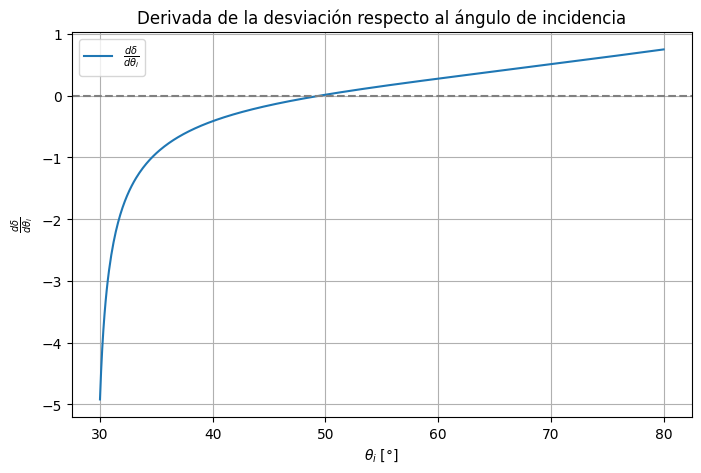

Ángulo mínimo (Newton-Raphson): 49.4642°
Ángulo mínimo (Secante/Bisección): 49.4642°
Ángulo crítico θc: 29.4302°


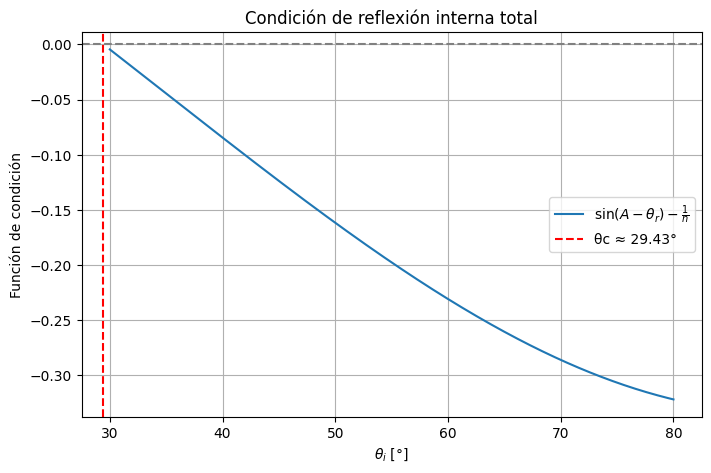

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import newton, bisect

# Parámetros del problema
n = 1.52  # Índice de refracción del prisma
A_deg = 60  # Ángulo del prisma en grados
A_rad = np.radians(A_deg)  # Ángulo en radianes

# Parte A

def theta_r(theta_i):
    """Calcula el ángulo de refracción en la primera interfaz usando la Ley de Snell."""
    return np.arcsin(np.sin(theta_i) / n)

def d_delta_d_theta_i(theta_i):
    """
    Calcula la derivada de δ respecto a θi según la fórmula dada.
    θi debe estar en radianes.
    """
    th_r = theta_r(theta_i)
    numerator = np.cos(theta_i) * np.cos(A_rad - th_r)
    denominator = np.cos(th_r) * np.sqrt(1 - n**2 * (np.sin(A_rad - th_r))**2)
    return 1 - numerator / denominator

# Gráfica de la derivada
theta_i_range_deg = np.linspace(30, 80, 500)
theta_i_range_rad = np.radians(theta_i_range_deg)
d_delta_vals = d_delta_d_theta_i(theta_i_range_rad)

plt.figure(figsize=(8,5))
plt.plot(theta_i_range_deg, d_delta_vals, label=r"$\frac{d\delta}{d\theta_i}$")
plt.axhline(0, color='gray', linestyle='--')
plt.xlabel(r"$\theta_i$ [°]")
plt.ylabel(r"$\frac{d\delta}{d\theta_i}$")
plt.title("Derivada de la desviación respecto al ángulo de incidencia")
plt.legend()
plt.grid(True)
plt.show()

# Encontrar θi mínimo usando métodos numéricos

# Método de Newton-Raphson (sin derivada explícita, usando scipy)
theta_i_min_rad_nr = newton(d_delta_d_theta_i, np.radians(50))
print(f"Ángulo mínimo (Newton-Raphson): {np.degrees(theta_i_min_rad_nr):.4f}°")

# Método de la secante usando scipy optimize bisect (como la derivada cambia de signo)
theta_i_min_rad_sec = bisect(d_delta_d_theta_i, np.radians(30), np.radians(80))
print(f"Ángulo mínimo (Secante/Bisección): {np.degrees(theta_i_min_rad_sec):.4f}°")

# Parte B

# Condición de reflexión interna total en la segunda interfaz
def crit_cond(theta_i):
    """Condición de reflexión interna total en la segunda interfaz."""
    th_r = theta_r(theta_i)
    return np.sin(A_rad - th_r) - 1/n

# Determinar el ángulo crítico θc numéricamente
theta_c_rad = bisect(crit_cond, np.radians(0.1), np.radians(80))
print(f"Ángulo crítico θc: {np.degrees(theta_c_rad):.4f}°")

# Confirmación gráfica (opcional)
plt.figure(figsize=(8,5))
plt.plot(theta_i_range_deg, crit_cond(theta_i_range_rad), label=r"$\sin(A - \theta_r) - \frac{1}{n}$")
plt.axhline(0, color='gray', linestyle='--')
plt.axvline(np.degrees(theta_c_rad), color='r', linestyle='--', label=f"θc ≈ {np.degrees(theta_c_rad):.2f}°")
plt.xlabel(r"$\theta_i$ [°]")
plt.ylabel("Función de condición")
plt.title("Condición de reflexión interna total")
plt.legend()
plt.grid(True)
plt.show()

